In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use('seaborn')

### Data Loading

In [3]:
df_salary = pd.read_csv('./datasets/salary_data.csv')
df_salary.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
df_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


### Data Exploration

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

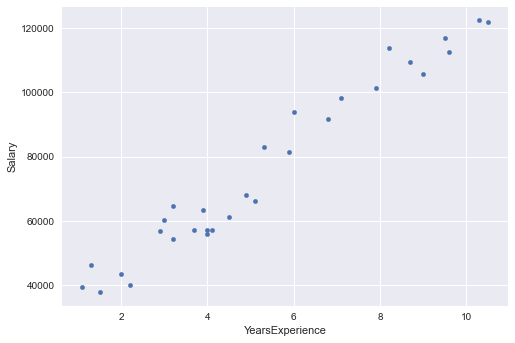

In [5]:
df_salary.plot.scatter(x='YearsExperience', y='Salary')

### Split Data

In [6]:
import sklearn
from sklearn.model_selection import train_test_split

In [7]:
train_data, test_data = train_test_split(df_salary, test_size=0.2, random_state=12)

In [8]:
print('Total Rows Data Training', train_data.shape[0])
print('Total Rows Data Testing', test_data.shape[0])

Total Rows Data Training 24
Total Rows Data Testing 6


### Prepare Data

In [10]:
train_label = train_data['Salary']

In [11]:
train_feature = train_data.drop(['Salary'], axis=1)

In [12]:
test_label = test_data['Salary']

In [13]:
test_feature = test_data.drop(['Salary'], axis=1)

### Train the Model

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
lr_model = LinearRegression()

In [17]:
## Data Training
lr_model.fit(X=train_feature, y=train_label)

LinearRegression()

### Test the Model

In [18]:
from sklearn.metrics import r2_score

In [19]:
accuracy_score = lr_model.score(test_feature,test_label)

In [20]:
print(f'Accuracy:{accuracy_score*100:.2f}')

Accuracy:94.29


In [21]:
salary_pred = lr_model.predict(test_feature)

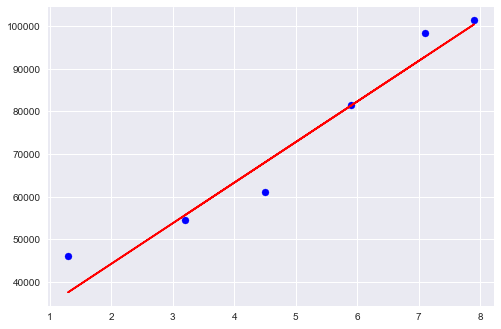

In [22]:
plt.scatter(test_data['YearsExperience'], test_data['Salary'], color='blue')
plt.plot(test_data['YearsExperience'], salary_pred, color='red')

In [23]:
print('Coefficient:', lr_model.coef_[0])
print('Intercept:', lr_model.intercept_)

Coefficient: 9509.996327102479
Intercept: 25243.60315167621


In [24]:
# y= bx + c
# y= 9509.996327102479x + 25243.60315167621

In [25]:
test_feature['YearsExperience']

7     3.2
22    7.9
18    5.9
14    4.5
1     1.3
21    7.1
Name: YearsExperience, dtype: float64

In [26]:
salary_pred

array([ 55675.5913984 , 100372.57413579,  81352.58148158,  68038.58662364,
        37606.59837691,  92764.5770741 ])